# Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Flatten,Dense, Dropout
from tensorflow.keras import Sequential, optimizers, losses, layers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad
from tensorflow.keras.regularizers import l2

In [3]:
df = pd.read_csv('Final_Dataset.csv')
df = df.dropna()

In [4]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Connection Type
0,192.168.2.4-91.189.91.49-41416-80-6,192.168.2.4,41416,91.189.91.49,80,6,31/10/2023 01:15:14 PM,284299,3,3,...,0.0,0.0,0.0,0.0,1.698773e+15,0.000000e+00,1.698773e+15,1.698773e+15,Benign,wired
1,192.168.2.4-91.189.91.49-41416-80-6,192.168.2.4,41416,91.189.91.49,80,6,31/10/2023 01:15:15 PM,3,2,0,...,0.0,0.0,0.0,0.0,1.698773e+15,0.000000e+00,1.698773e+15,1.698773e+15,Benign,wired
2,192.168.1.1-192.168.1.9-37728-8080-6,192.168.1.1,37728,192.168.1.9,8080,6,31/10/2023 01:15:12 PM,5803248,7,20,...,40284.0,0.0,40284.0,40284.0,8.493863e+14,1.201214e+15,1.698773e+15,5.762964e+06,Benign,wired
3,192.168.1.87-142.250.80.4-35032-80-6,192.168.1.87,35032,142.250.80.4,80,6,31/10/2023 01:15:26 PM,145801,5,3,...,0.0,0.0,0.0,0.0,1.698773e+15,0.000000e+00,1.698773e+15,1.698773e+15,Benign,wired
4,192.168.1.207-18.164.124.116-39264-443-6,192.168.1.207,39264,18.164.124.116,443,6,31/10/2023 01:15:31 PM,82152,9,10,...,0.0,0.0,0.0,0.0,1.698773e+15,0.000000e+00,1.698773e+15,1.698773e+15,Benign,wired


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61312 entries, 0 to 61488
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     61312 non-null  object 
 1   Src IP                      61312 non-null  object 
 2   Src Port                    61312 non-null  int64  
 3   Dst IP                      61312 non-null  object 
 4   Dst Port                    61312 non-null  int64  
 5   Protocol                    61312 non-null  int64  
 6   Timestamp                   61312 non-null  object 
 7   Flow Duration               61312 non-null  int64  
 8   Total Fwd Packet            61312 non-null  int64  
 9   Total Bwd packets           61312 non-null  int64  
 10  Total Length of Fwd Packet  61312 non-null  float64
 11  Total Length of Bwd Packet  61312 non-null  float64
 12  Fwd Packet Length Max       61312 non-null  float64
 13  Fwd Packet Length Min       61312 no

In [6]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,61312.000000,61312.000000,61312.000000,6.131200e+04,61312.000000,61312.000000,6.131200e+04,6.131200e+04,61312.000000,61312.000000,...,61312.000000,61312.000000,6.131200e+04,6.131200e+04,6.131200e+04,6.131200e+04,6.131200e+04,6.131200e+04,6.131200e+04,6.131200e+04
mean,33917.887591,10496.420978,7.329479,5.526878e+06,7.946944,8.761189,4.113475e+03,3.100417e+04,148.914372,10.933618,...,4.049158,19.333442,1.690951e+05,3.768120e+04,2.050154e+05,1.399565e+05,1.504906e+15,2.471550e+14,1.698824e+15,1.335041e+15
std,23810.388519,18687.563998,5.218323,1.115194e+07,174.571663,265.512144,2.740699e+05,1.518680e+06,870.484158,39.178181,...,137.080954,11.563305,1.087408e+06,4.587261e+05,1.308447e+06,1.000907e+06,3.775421e+14,4.769617e+14,1.034010e+11,6.968948e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415785e+14,0.000000e+00,1.698678e+15,5.000013e+06
25%,5353.000000,53.000000,6.000000,5.858000e+03,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698678e+15,0.000000e+00,1.698696e+15,1.698678e+15
50%,42378.500000,443.000000,6.000000,7.369450e+04,2.000000,1.000000,6.000000e+00,0.000000e+00,2.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698759e+15,0.000000e+00,1.698847e+15,1.698759e+15
75%,55551.000000,8194.000000,6.000000,3.635660e+06,3.000000,1.000000,4.200000e+01,1.010000e+02,31.000000,6.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.698853e+15,0.000000e+00,1.698853e+15,1.698853e+15
max,65534.000000,65535.000000,17.000000,6.055938e+07,16164.000000,28683.000000,2.447558e+07,2.367148e+08,30360.000000,2492.000000,...,14298.000000,44.000000,4.563963e+07,2.360663e+07,4.563963e+07,4.563963e+07,1.699022e+15,1.201390e+15,1.699022e+15,1.699022e+15


In [7]:
nan_per_column = df.isna().any()
print("\nColumns with NaN values:")
print(nan_per_column[nan_per_column])


Columns with NaN values:
Series([], dtype: bool)


In [8]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [9]:
df['Label'].value_counts()

Label
Benign                10499
ICMP Flood             8299
OS Scan                7067
ARP Spoofing           6952
DNS Flood              6806
Slowloris              6603
SYN Flood              6067
Port Scan              6000
Vulnerability Scan     3019
Name: count, dtype: int64

In [10]:
df['Connection Type'] = df['Connection Type'].replace({'wired':1,'wireless':0})
Label_Encoder = LabelEncoder()
df['Label'] = Label_Encoder.fit_transform(df['Label'])
X = df.select_dtypes(exclude='object')
X.drop('Label',axis=1,inplace=True)

In [11]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Label'])
df['label_encoded'] = encoded_labels

In [12]:
y = df['label_encoded']

In [13]:
has_inf = np.any(np.isinf(X), axis=0)

cols_with_inf = X.columns[has_inf]

print("Columns with 'inf' values:")
print(cols_with_inf)

replacement_value = 10000
X[cols_with_inf] = X[cols_with_inf].replace([np.inf, -np.inf], replacement_value)

has_inf_after_replace = np.any(np.isinf(X), axis=0)
print("\nColumns with 'inf' values after replacement:")
print(X.columns[has_inf_after_replace])

Columns with 'inf' values:
Index(['Flow Bytes/s', 'Flow Packets/s'], dtype='object')

Columns with 'inf' values after replacement:
Index([], dtype='object')


In [14]:
max1 = np.finfo(np.float64).max
col1 = X.columns[(X > max1).any()]
print(col1)

Index([], dtype='object')


In [15]:
y.value_counts()

label_encoded
1    10499
3     8299
4     7067
0     6952
2     6806
7     6603
6     6067
5     6000
8     3019
Name: count, dtype: int64

In [16]:
y.shape

(61312,)

In [17]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = np.zeros((len(y_encoded), 9))
y_one_hot[np.arange(len(y_encoded)), y_encoded] = 1

In [18]:
y_one_hot[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y_one_hot,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(49049, 80)

In [21]:
import keras
from keras.callbacks import Callback

class ReduceLRonDrop(Callback):
    def __init__(self, factor=0.2, threshold=0.05, patience=3):
        super(ReduceLRonDrop, self).__init__()
        self.factor = factor
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        if epoch > 0:
            acc_diff = logs['val_accuracy'] - self.prev_accuracy
            if acc_diff < -self.threshold:
                lr = float(keras.backend.get_value(self.model.optimizer.lr))
                new_lr = lr * self.factor
                keras.backend.set_value(self.model.optimizer.lr, new_lr)
                print(f'Reducing learning rate to {new_lr:.6f} due to accuracy drop.')
                self.wait = 0
            else:
                self.wait += 1
                if self.wait >= self.patience:
                    self.wait = 0
                    lr = float(keras.backend.get_value(self.model.optimizer.lr))
                    new_lr = lr * self.factor
                    keras.backend.set_value(self.model.optimizer.lr, new_lr)
                    print(f'Reducing learning rate to {new_lr:.6f} due to patience.')
        
        self.prev_accuracy = logs['val_accuracy']

early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr_on_drop = ReduceLRonDrop(factor=0.2, threshold=0.05, patience=3)

In [22]:
def create_model():
    model1 = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(80, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(9, activation='sigmoid')
    ])
    return model1

In [23]:
history_arr=[]
metric_arr=[]
optimizers = ['RMSprop','SGD','Adam','Adagrad']
for optimizer in optimizers:
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.2,
                        callbacks=[early_stopping, reduce_lr_on_drop])
    history_arr.append(history)
    arr = []
    y_pred = model.predict(X_test)
    y1 = y_pred.argmax(axis=1)
    y2 = y_test.argmax(axis=1)
    precision = precision_score(y2, y1, average='weighted')
    recall = recall_score(y2, y1, average='weighted')
    f1 = f1_score(y2, y1, average='weighted')
    arr.append(precision)
    arr.append(recall)
    arr.append(f1)
    metric_arr.append(arr)
    if optimizer=='RMSprop':
        conf_matrix = confusion_matrix(y2,y1)




Epoch 1/25


307/307 [==============================] - 5s 12ms/step - loss: 1.0959 - accuracy: 0.7767 - val_loss: 0.7386 - val_accuracy: 0.8663
Epoch 2/25
307/307 [==============================] - 3s 10ms/step - loss: 0.5663 - accuracy: 0.8945 - val_loss: 0.6438 - val_accuracy: 0.8717
Epoch 3/25
307/307 [==============================] - 3s 11ms/step - loss: 0.4430 - accuracy: 0.9152 - val_loss: 0.3731 - val_accuracy: 0.9394
Epoch 4/25
307/307 [==============================] - 3s 11ms/step - loss: 0.3669 - accuracy: 0.9321 - val_loss: 0.4155 - val_accuracy: 0.9048
Epoch 5/25
307/307 [==============================] - 3s 10ms/step - loss: 0.2244 - accuracy: 0.9851 - val_loss: 0.1974 - val_accuracy: 0.9900
Epoch 6/25
307/307 [==============================] - 3s 10ms/step - loss: 0.1864 - accuracy: 0.9912 - val_loss: 0.2252 - val_accuracy: 0.9681
Epoch 7/25
307/307 [==============================] - 3s 11ms/step - loss: 0.1735 - accuracy: 0.9907 - val_loss: 0.1727 - val_accuracy: 0

Epoch 14/25
307/307 [==============================] - 3s 10ms/step - loss: 1.1729 - accuracy: 0.8813 - val_loss: 1.1805 - val_accuracy: 0.8765
Epoch 15/25
307/307 [==============================] - 3s 10ms/step - loss: 1.1727 - accuracy: 0.8806 - val_loss: 1.1804 - val_accuracy: 0.8766
Epoch 16/25
307/307 [==============================] - 3s 10ms/step - loss: 1.1726 - accuracy: 0.8808 - val_loss: 1.1802 - val_accuracy: 0.8767
Epoch 17/25
307/307 [==============================] - 3s 9ms/step - loss: 1.1725 - accuracy: 0.8808 - val_loss: 1.1802 - val_accuracy: 0.8767
Epoch 18/25
307/307 [==============================] - 3s 10ms/step - loss: 1.1724 - accuracy: 0.8808 - val_loss: 1.1802 - val_accuracy: 0.8768
Epoch 19/25
307/307 [==============================] - 3s 9ms/step - loss: 1.1724 - accuracy: 0.8809 - val_loss: 1.1801 - val_accuracy: 0.8768
Epoch 20/25
307/307 [==============================] - 3s 9ms/step - loss: 1.1724 - accuracy: 0.8808 - val_loss: 1.1801 - val_accuracy: 0.

Epoch 8/25
307/307 [==============================] - 3s 10ms/step - loss: 1.9664 - accuracy: 0.6689 - val_loss: 1.9785 - val_accuracy: 0.6674
Epoch 9/25
307/307 [==============================] - 3s 10ms/step - loss: 1.9564 - accuracy: 0.6724 - val_loss: 1.9690 - val_accuracy: 0.6725
Epoch 10/25
307/307 [==============================] - 3s 10ms/step - loss: 1.9470 - accuracy: 0.6777 - val_loss: 1.9599 - val_accuracy: 0.6754
Epoch 11/25
307/307 [==============================] - 3s 10ms/step - loss: 1.9414 - accuracy: 0.6789 - val_loss: 1.9582 - val_accuracy: 0.6758
Epoch 12/25
307/307 [==============================] - 3s 11ms/step - loss: 1.9396 - accuracy: 0.6794 - val_loss: 1.9565 - val_accuracy: 0.6760
Epoch 13/25
307/307 [==============================] - 3s 11ms/step - loss: 1.9379 - accuracy: 0.6799 - val_loss: 1.9548 - val_accuracy: 0.6766
Epoch 14/25
307/307 [==============================] - 3s 10ms/step - loss: 1.9369 - accuracy: 0.6801 - val_loss: 1.9545 - val_accuracy: 0

In [24]:
print(metric_arr)

[[0.9926748428134667, 0.9926608497105113, 0.992661826183905], [0.8777748792247785, 0.8776808285085216, 0.8755304116181135], [0.9913791547193869, 0.9913561118812688, 0.9913593053121106], [0.699915781702315, 0.6817255157791732, 0.6562501897393312]]


[0.7767017483711243, 0.8944927453994751, 0.9152119159698486, 0.9321338534355164, 0.9850913882255554, 0.991233229637146, 0.9907234907150269, 0.9940620064735413, 0.994163990020752, 0.994240403175354, 0.9943933486938477, 0.9943423867225647, 0.9944443106651306, 0.9944697618484497, 0.9944697618484497, 0.9944187998771667, 0.9944697618484497, 0.9944952726364136, 0.9944697618484497, 0.9944952726364136, 0.9944952726364136, 0.9944952726364136, 0.9944952726364136, 0.9944952726364136, 0.9944952726364136]
[0.43668287992477417, 0.7101863026618958, 0.7754784822463989, 0.8155406713485718, 0.850225567817688, 0.8577945232391357, 0.8661535978317261, 0.8757613301277161, 0.8774178624153137, 0.8783863186836243, 0.8813425302505493, 0.8797879815101624, 0.8806799650192261, 0.8812661170959473, 0.8806289434432983, 0.880781888961792, 0.8808073401451111, 0.8807563781738281, 0.8808838129043579, 0.880781888961792, 0.8808073401451111, 0.880781888961792, 0.880781888961792, 0.880781888961792, 0.880781888961792]
[0.8133

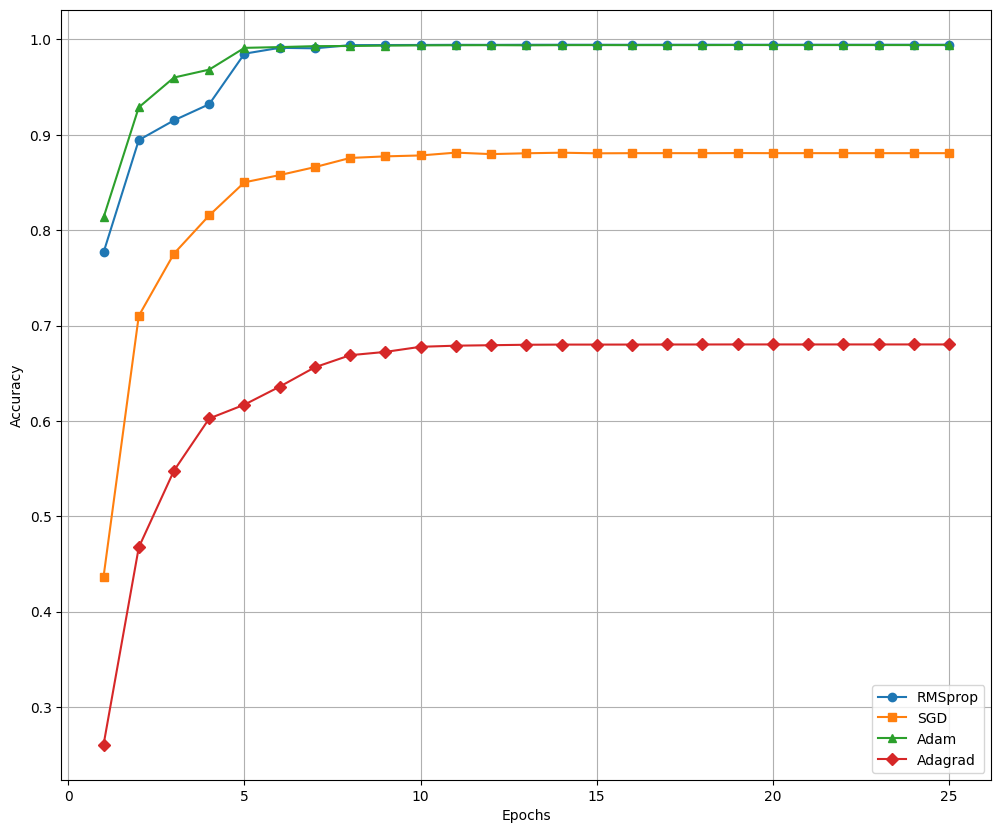

In [27]:
acc_val = []
markers=['o','s','^','D']
for history in history_arr:
    acc_val.append(history.history['accuracy'])
print(acc_val[0])
print(acc_val[1])
print(acc_val[2])
print(acc_val[3])
epochs = range(1,len(acc_val[0])+1)
plt.figure(figsize=(12,10))
for i,acc in enumerate(acc_val):
    plt.plot(epochs,acc,label=optimizers[i],marker=markers[i])
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.title('Accuracy of different models')
plt.legend()
#plt.savefig('Accuracy.pdf',dpi=600,format='pdf',bbox_inches='tight')
plt.show()

[1.0958595275878906, 0.5662892460823059, 0.44300124049186707, 0.36689502000808716, 0.22444775700569153, 0.1863711178302765, 0.1734544187784195, 0.15685121715068817, 0.1518569439649582, 0.1479080468416214, 0.14471973478794098, 0.14393587410449982, 0.14317946135997772, 0.14251463115215302, 0.1423497498035431, 0.14220593869686127, 0.14206752181053162, 0.14203336834907532, 0.14200745522975922, 0.14197847247123718, 0.14197292923927307, 0.14196626842021942, 0.14196032285690308, 0.14195916056632996, 0.14195796847343445]
[2.6377182006835938, 1.6909432411193848, 1.4177196025848389, 1.3039389848709106, 1.2340503931045532, 1.2156933546066284, 1.1981799602508545, 1.1849825382232666, 1.1810846328735352, 1.177477478981018, 1.1748912334442139, 1.174147605895996, 1.1733946800231934, 1.1728670597076416, 1.1727176904678345, 1.1725730895996094, 1.1724611520767212, 1.17243230342865, 1.1724036931991577, 1.1723823547363281, 1.172377586364746, 1.1723726987838745, 1.172369360923767, 1.1723685264587402, 1.1723

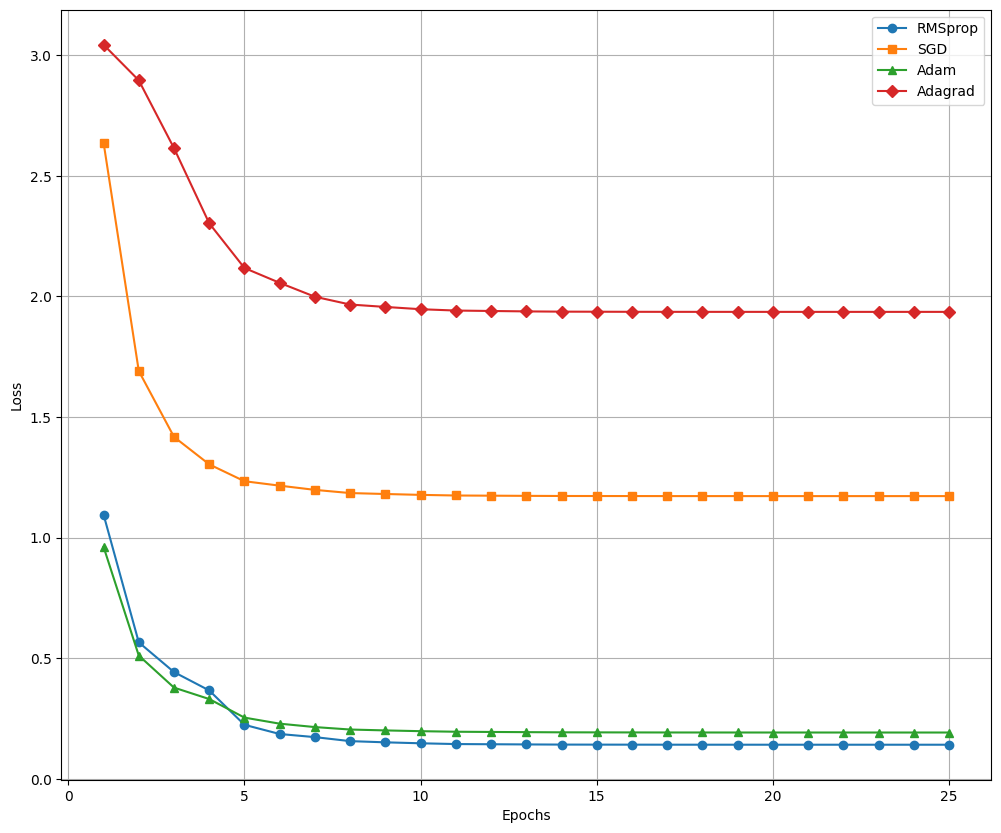

In [28]:
loss_val = []
for history in history_arr:
    loss_val.append(history.history['loss'])
print(loss_val[0])
print(loss_val[1])
print(loss_val[2])
print(loss_val[3])
epochs = range(1,len(loss_val[0])+1)
plt.figure(figsize=(12,10))
for i,acc in enumerate(loss_val):
    plt.plot(epochs,acc,label=optimizers[i],marker=markers[i])
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Loss of different models')
plt.legend()
plt.grid(True)
#plt.savefig('Loss.pdf',dpi=600,format='pdf',bbox_inches='tight')
plt.show()

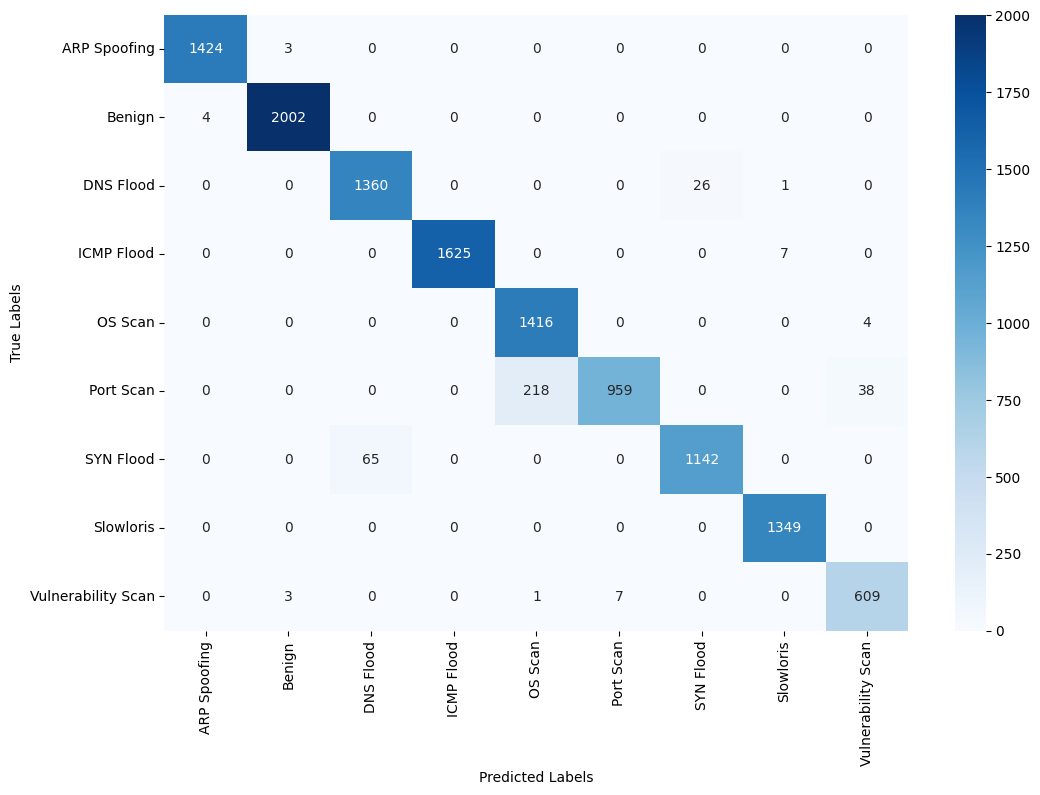

In [73]:
threats= ['ARP Spoofing','Benign','DNS Flood','ICMP Flood','OS Scan','Port Scan','SYN Flood','Slowloris','Vulnerability Scan']
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=threats, yticklabels=threats)
#plt.title('Confusion Matrix for RMSprop Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('Confusion_Matrix.pdf',dpi=600,format='pdf',bbox_inches='tight')
plt.show()

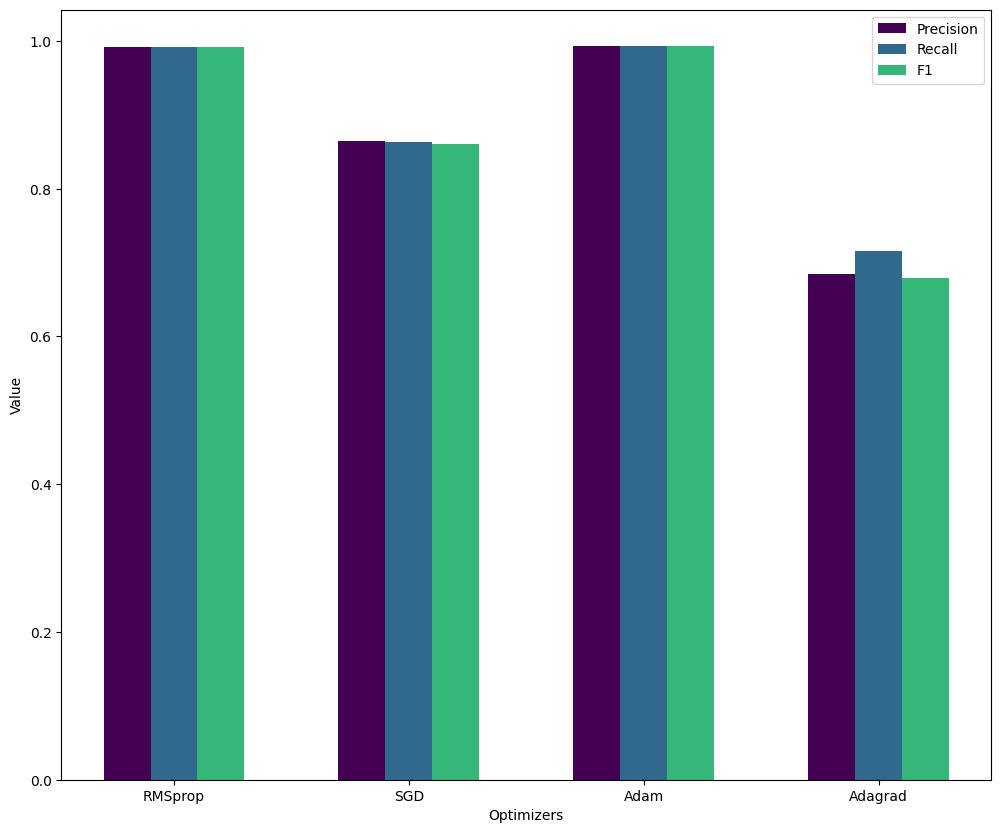

In [65]:
metric = ['Precision','Recall','F1']
num_bars = len(metric) #3
num_groups = len(optimizers) #4
bar_width = 0.2
colors = plt.cm.viridis(np.linspace(0, 1, 4))
fig, abc = plt.subplots(figsize=(12, 10))
for i, label in enumerate(metric):
    positions = np.arange(num_groups) + i * bar_width
    bars = abc.bar(positions, [group[i] for group in metric_arr], bar_width, label=label, color=colors[i])
abc.set_xticks(np.arange(num_groups) + (num_bars - 1) * bar_width / 2)
abc.set_xticklabels(optimizers)
abc.set_xlabel('Optimizers')
abc.set_ylabel('Value')
#abc.set_title('Precision, Recall, F1 Score graph')
abc.legend()
plt.savefig('Metrics.pdf',dpi=600,format='pdf',bbox_inches='tight')
plt.show()